In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

import string
import re
import nltk
import ssl
import os

from nltk.corpus import stopwords

from wordcloud import WordCloud

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk_download = 'nltk_download'


if not os.path.exists(nltk_download):
    os.mkdir(nltk_download)

if not os.path.exists(os.path.join(nltk_download, 'corpora/stopwords')):
    nltk.download('stopwords', download_dir=nltk_download)

if not os.path.exists(os.path.join(nltk_download, 'corpora/wordnet.zip')):
    nltk.download('wordnet', download_dir=nltk_download)

if not os.path.exists(os.path.join(nltk_download, 'corpora/omw-1.4.zip')):
    nltk.download('omw-1.4', download_dir=nltk_download)

nltk.data.path.append(nltk_download)

pd.pandas.set_option('display.max_columns', None)

filename = 'Tokopedia.csv'
df = pd.read_csv(filename)
df.head()

KeyboardInterrupt: 

In [45]:
data = df[['reviewContent','rating']].dropna()
data.head()

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
7,bima,1


In [46]:
def clean_text(text):
    return re.sub('[^a-zA-Z]',' ',text).lower()
data['clean_text'] = data['reviewContent'].apply(lambda x: clean_text(x))
data['label'] = data['rating'].map({5: 'positif', 4: 'positif', 3: 'netral', 2: 'negatif', 1: 'negatif'})

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
data['review_len'] = data['reviewContent'].apply(lambda x: len(x) - x.count(" "))
data['punct'] = data['reviewContent'].apply(lambda x: count_punct(x))
data.head()

def tokenize_text(text):
    tokenize_text = text.split()
    return tokenize_text
data['tokens']  =   data['clean_text'].apply(lambda x: tokenize_text(x))
data.head()

all_stopwords = stopwords.words('indonesian')
all_stopwords.remove('tidak')

def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
data['lemmatize_review'] = data['tokens'].apply(lambda x: lemmatize_text(x))
data.head()

,reviewContent,rating,clean_text,label,review_len,punct,tokens,lemmatize_review
0,bagus mantap dah sesui pesanan,5,bagus mantap dah sesui pesanan,positif,26,0.0,"[bagus, mantap, dah, sesui, pesanan]",bagus mantap dah sesui pesanan
1,"Bagus, sesuai foto",4,bagus sesuai foto,positif,16,6.2,"[bagus, sesuai, foto]",bagus sesuai foto
2,okkkkk mantaaaaaaapppp ... goood,5,okkkkk mantaaaaaaapppp goood,positif,29,10.3,"[okkkkk, mantaaaaaaapppp, goood]",okkkkk mantaaaaaaapppp goood
3,bagus sesuai,4,bagus sesuai,positif,11,0.0,"[bagus, sesuai]",bagus sesuai
7,bima,1,bima,negatif,4,0.0,[bima],bima


In [47]:
print(f"Input data has {len(data)} rows and {len(data.columns)} columns")
print(f"rating 1 = {len(data[data['rating'] == 1])} rows")
print(f"rating 2 = {len(data[data['rating'] == 2])} rows")
print(f"rating 3 = {len(data[data['rating'] == 3])} rows")
print(f"rating 4 = {len(data[data['rating'] == 4])} rows")
print(f"rating 5 = {len(data[data['rating'] == 5])} rows")

Input data has 505 rows and 8 columns
rating 1 = 66 rows
rating 2 = 18 rows
rating 3 = 37 rows
rating 4 = 70 rows
rating 5 = 314 rows


Number of null in label: 0
Number of null in label: 0


<Axes: xlabel='rating', ylabel='count'>

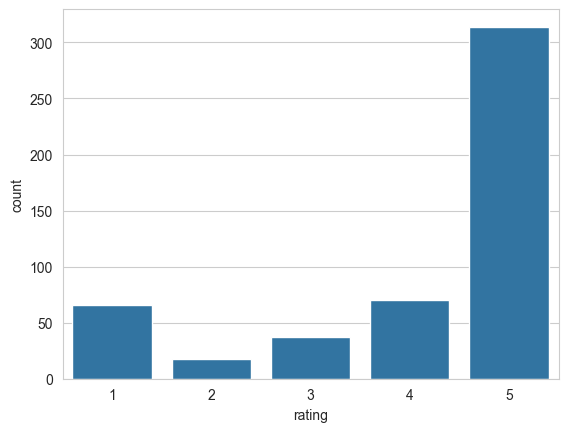

In [48]:
print(f"Number of null in label: {data['rating'].isnull().sum()}")
print(f"Number of null in label: {data['reviewContent'].isnull().sum()}")
sns.countplot(x='rating', data=data)

In [49]:
data_negative = data[ (data['rating'] == 1) | (data['rating'] == 2)]
data_neutral = data[ (data['rating'] == 3)]
data_positive = data[ (data['rating'] == 4) | (data['rating'] == 5)]

negative_list = data_negative['lemmatize_review'].tolist()
neutral_list = data_neutral['lemmatize_review'].tolist()
positive_list = data_positive['lemmatize_review'].tolist()

filtered_negative = ("").join(negative_list)
filtered_negative = filtered_negative.lower()

filtered_neutral = ("").join(neutral_list)
filtered_neutral = filtered_neutral.lower()

filtered_positive = ("").join(positive_list)
filtered_positive = filtered_positive.lower()

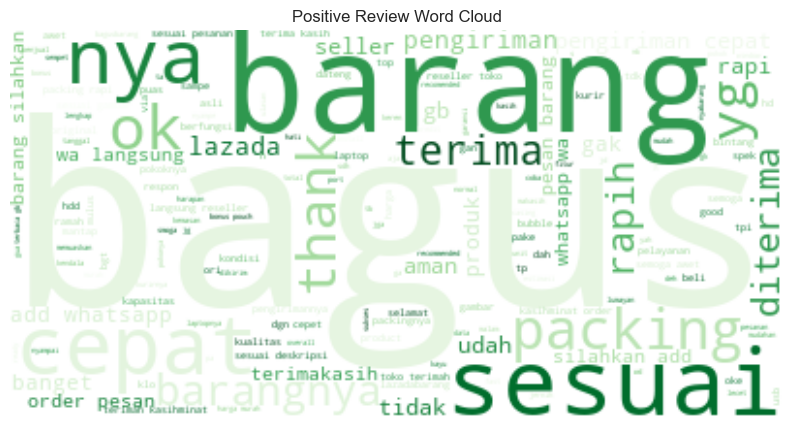

In [50]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Review Word Cloud")
plt.show()

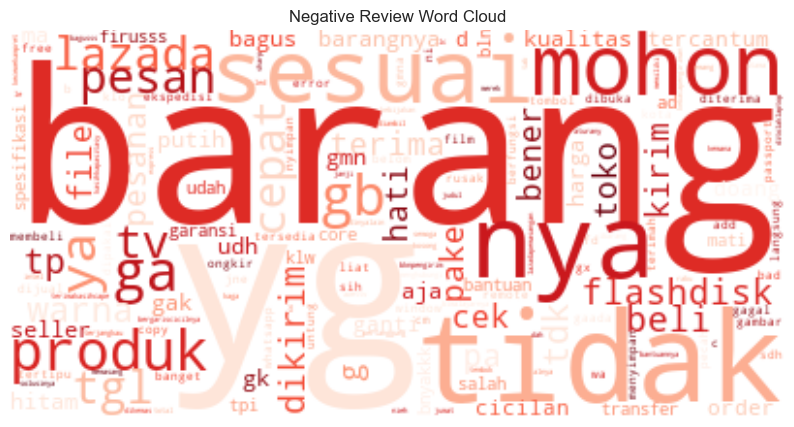

In [51]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Review Word Cloud")
plt.show()

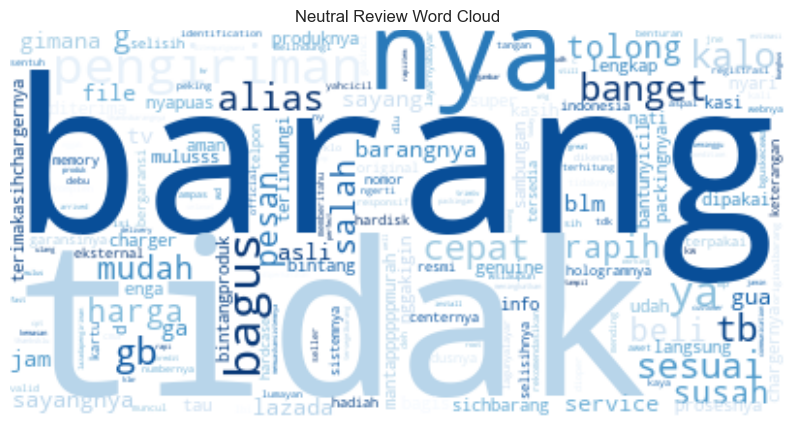

In [52]:

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_neutral)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Neutral Review Word Cloud")
plt.show()

In [53]:
data['lemmatize_review'] = data['lemmatize_review'].astype(str)
X = data[['lemmatize_review','review_len','punct']]
y = data['label']
print(X.shape)
print(y.shape)

(505, 3)
(505,)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 3)
(152, 3)
(353,)
(152,)


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df= 0.5, min_df = 2)
tfidf_train = tfidf.fit_transform(X_train['lemmatize_review'])
tfidf_test = tfidf.transform(X_test['lemmatize_review'])

X_train_vect = pd.DataFrame(tfidf_train.toarray(), columns=tfidf.get_feature_names_out())
X_test_vect = pd.DataFrame(tfidf_test.toarray(), columns=tfidf.get_feature_names_out())

X_train_combined = pd.concat([X_train[['review_len','punct']].reset_index(drop=True),
               X_train_vect], axis=1)
X_test_combined = pd.concat([X_test[['review_len','punct']].reset_index(drop=True), X_test_vect], axis=1)

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        28
      netral       0.00      0.00      0.00        12
     positif       0.74      1.00      0.85       112

    accuracy                           0.74       152
   macro avg       0.25      0.33      0.28       152
weighted avg       0.54      0.74      0.63       152



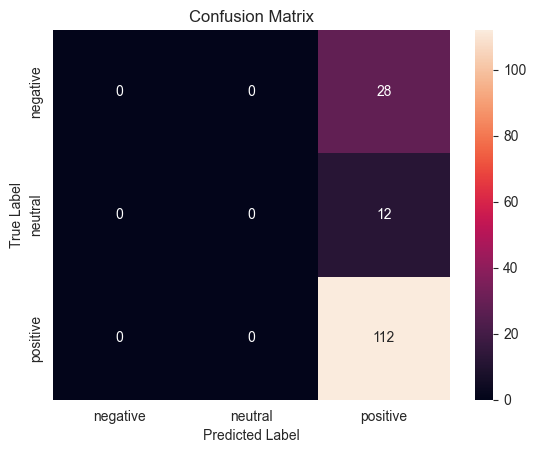

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

print(classification_report(y_test, naive_bayes_pred))

class_label = ['negative', 'neutral', 'positive']
data_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index = class_label, columns = class_label)
sns.heatmap(data_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

     negatif       0.73      0.29      0.41        28
      netral       0.50      0.08      0.14        12
     positif       0.79      0.98      0.88       112

    accuracy                           0.78       152
   macro avg       0.67      0.45      0.48       152
weighted avg       0.76      0.78      0.73       152



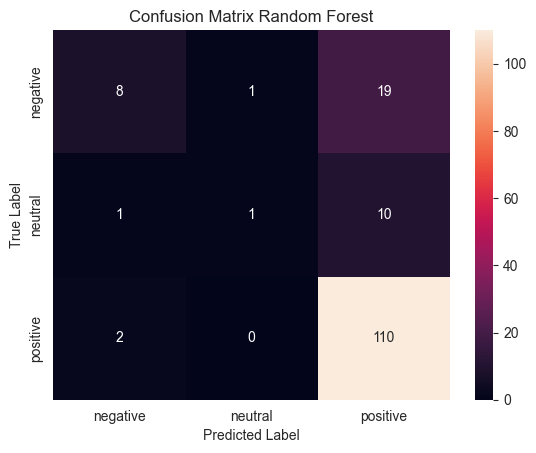

In [57]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

print(classification_report(y_test, random_forest_pred))

# confusion matrix
class_label = ['negative', 'neutral', 'positive']
data_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index = class_label, columns = class_label)
sns.heatmap(data_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

     negatif       0.67      0.14      0.24        28
      netral       0.00      0.00      0.00        12
     positif       0.75      0.98      0.85       112

    accuracy                           0.75       152
   macro avg       0.47      0.38      0.36       152
weighted avg       0.68      0.75      0.67       152



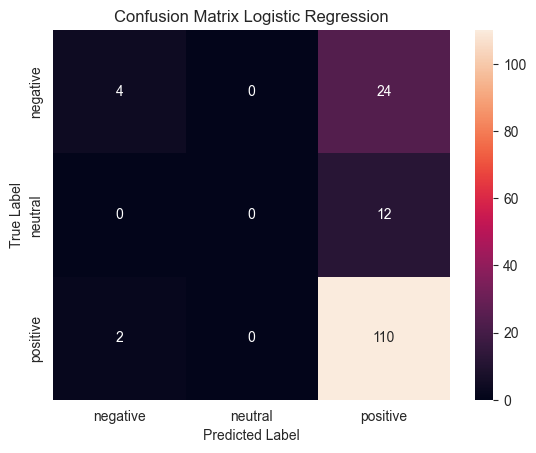

In [58]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_vect, y_train)
log_reg_pred = logistic_classifier.predict(X_test_vect)
print(classification_report(y_test, log_reg_pred))

class_label = ['negative', 'neutral', 'positive']
data_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index = class_label, columns = class_label)
sns.heatmap(data_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

     negatif       0.82      0.32      0.46        28
      netral       0.00      0.00      0.00        12
     positif       0.78      0.98      0.87       112

    accuracy                           0.78       152
   macro avg       0.53      0.43      0.44       152
weighted avg       0.73      0.78      0.73       152



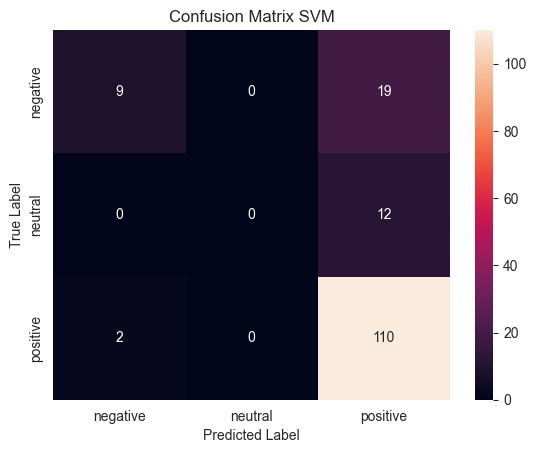

In [59]:

# SVM
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train_vect, y_train)
svm_pred = svm_classifier.predict(X_test_vect)
print(classification_report(y_test, svm_pred))

class_label = ['negative', 'neutral', 'positive']
data_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index = class_label, columns = class_label)
sns.heatmap(data_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        28
      netral       0.00      0.00      0.00        12
     positif       0.74      1.00      0.85       112

    accuracy                           0.74       152
   macro avg       0.25      0.33      0.28       152
weighted avg       0.55      0.74      0.63       152



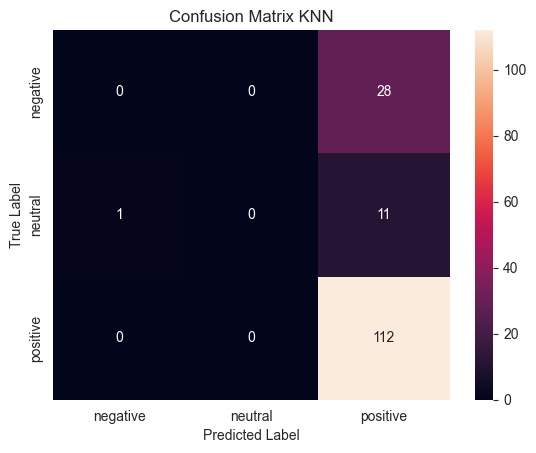

In [60]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_vect, y_train)
knn_pred = knn_classifier.predict(X_test_vect)
print(classification_report(y_test, knn_pred))

class_label = ['negative', 'neutral', 'positive']
data_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index = class_label, columns = class_label)
sns.heatmap(data_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score

models = [
    MultinomialNB(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=150),
    SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=5)
]

names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy","precision","recall","f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()}")
    print()

Naive Bayes
 accuracy - 0.781904761904762
 precision - nan
 recall - nan
 f1 - nan

Logistic Regression
 accuracy - 0.7905555555555555
 precision - nan
 recall - nan
 f1 - nan

Random Forest
 accuracy - 0.784920634920635
 precision - nan
 recall - nan
 f1 - nan

SVM
 accuracy - 0.7906349206349207
 precision - nan
 recall - nan
 f1 - nan

KNN
 accuracy - 0.7705555555555555
 precision - nan
 recall - nan
 f1 - nan



In [63]:
# prediction

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_cv = cv.fit_transform(data['lemmatize_review'])
y_cv = data['label']

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

clf = MultinomialNB()
clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

data = ["Bagus broooooo"]
vect = cv.transform(data).toarray()
new_pred = clf.predict(vect)
print(new_pred)

TypeError: list indices must be integers or slices, not str